Data Information for ../data/cleaned/DoctorsET_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _                        803 non-null    object 
 1   id                       803 non-null    int64  
 2   peer_id                  803 non-null    object 
 3   date                     803 non-null    int64  
 4   message                  803 non-null    object 
 5   out                      803 non-null    bool   
 6   mentioned                803 non-null    bool   
 7   media_unread             803 non-null    bool   
 8   silent                   803 non-null    bool   
 9   post                     803 non-null    bool   
 10  from_scheduled           803 non-null    object 
 11  legacy                   803 non-null    bool   
 12  edit_hide                803 non-null    object 
 13  pinned            

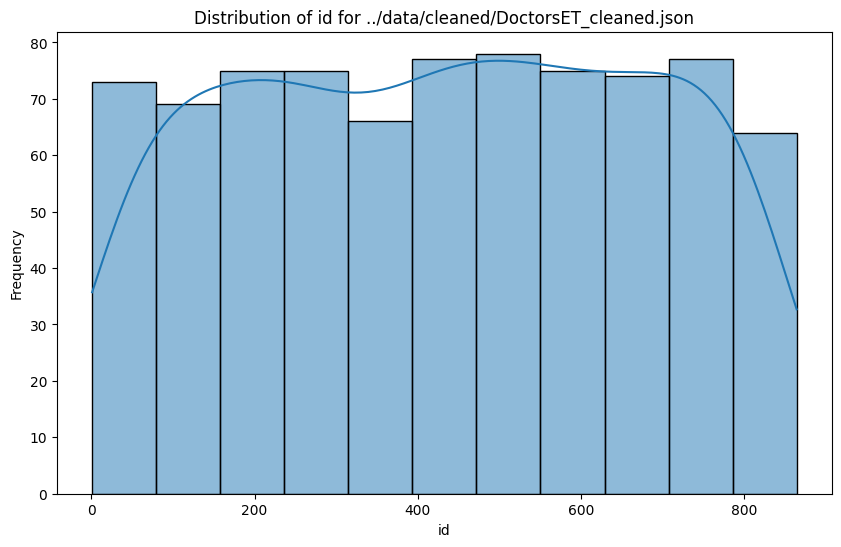

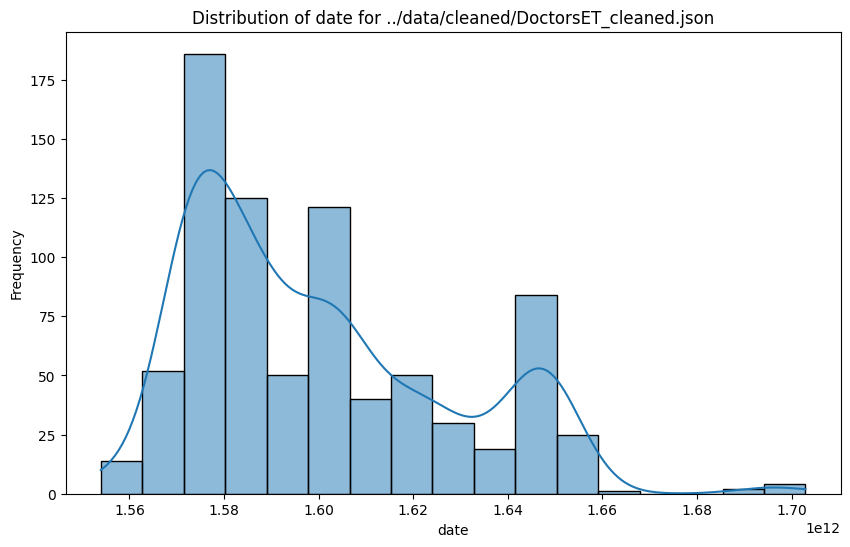

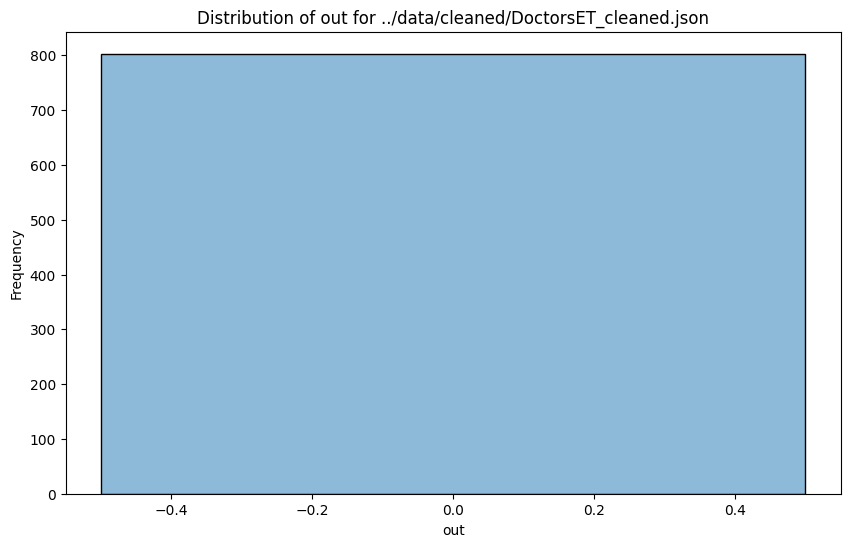

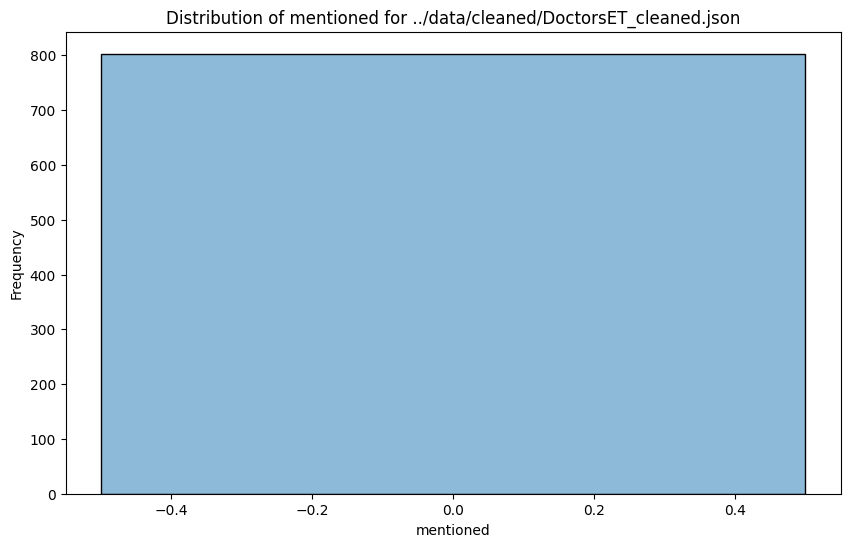

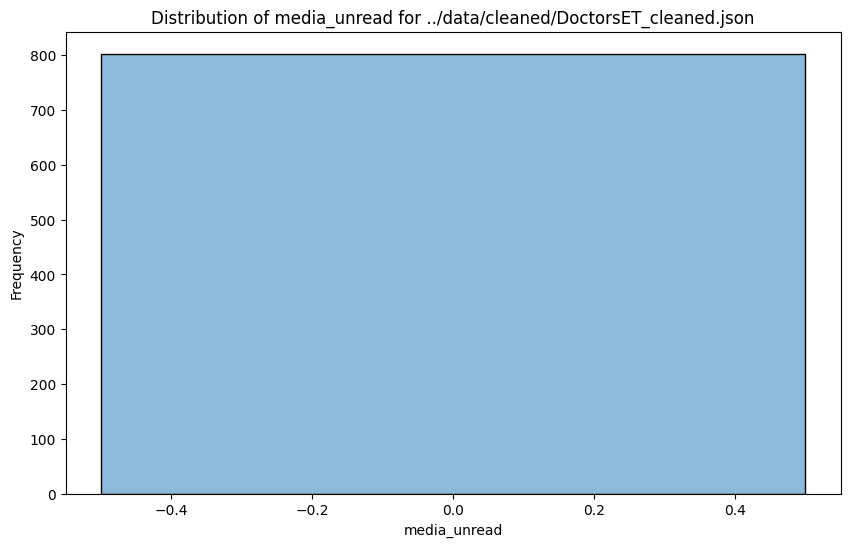

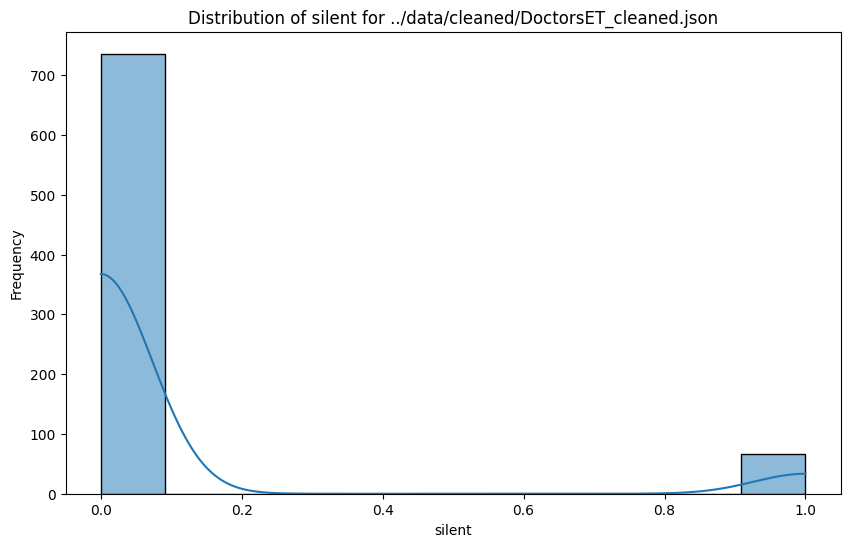

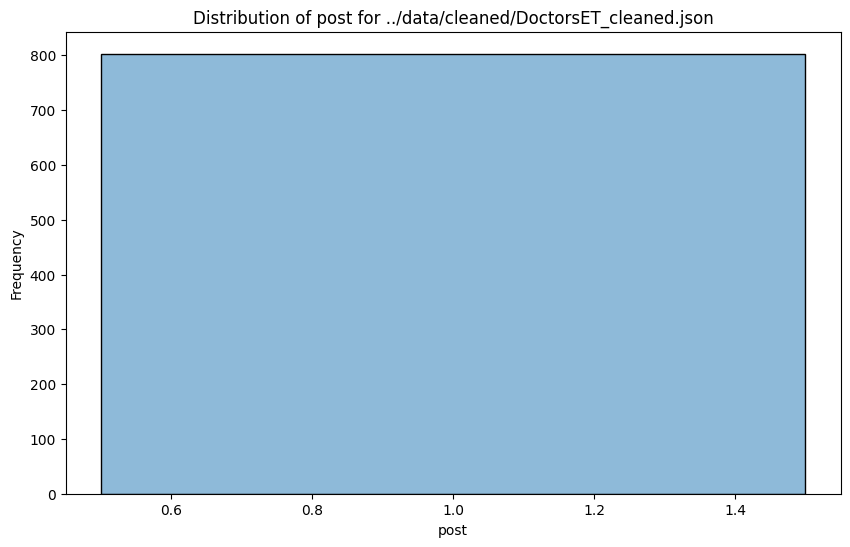

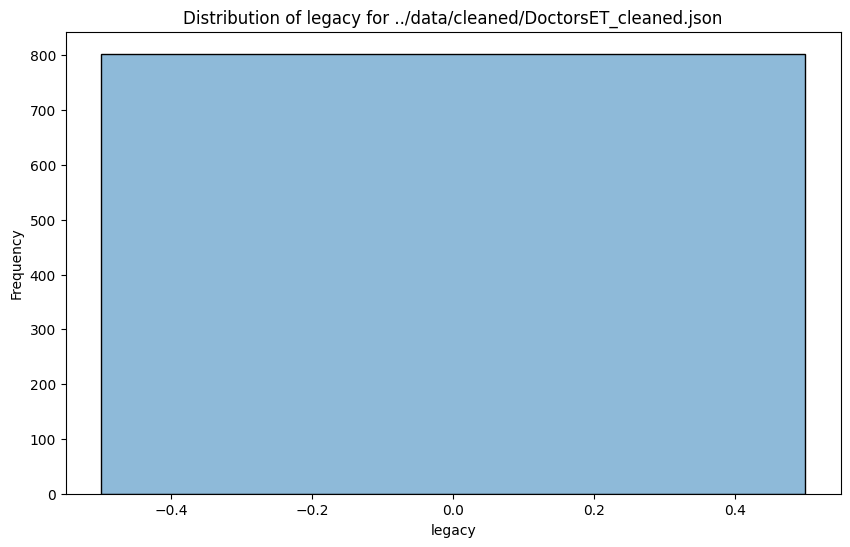

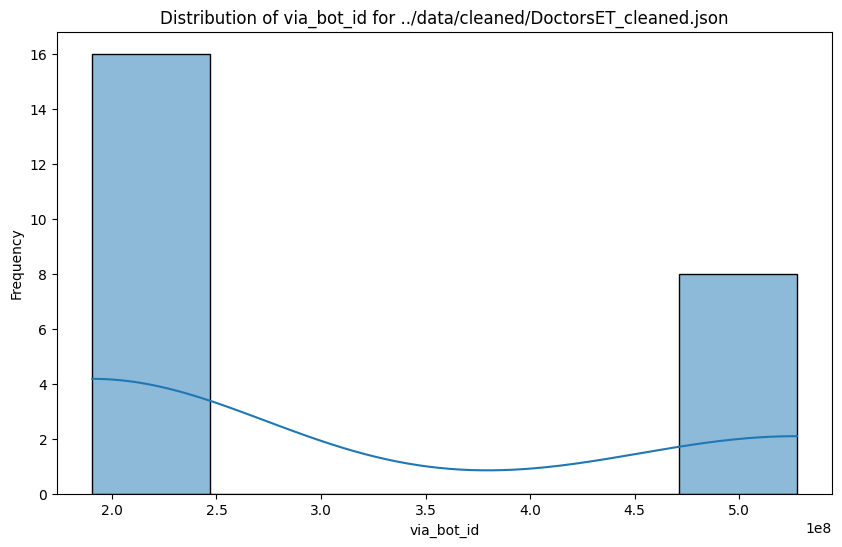

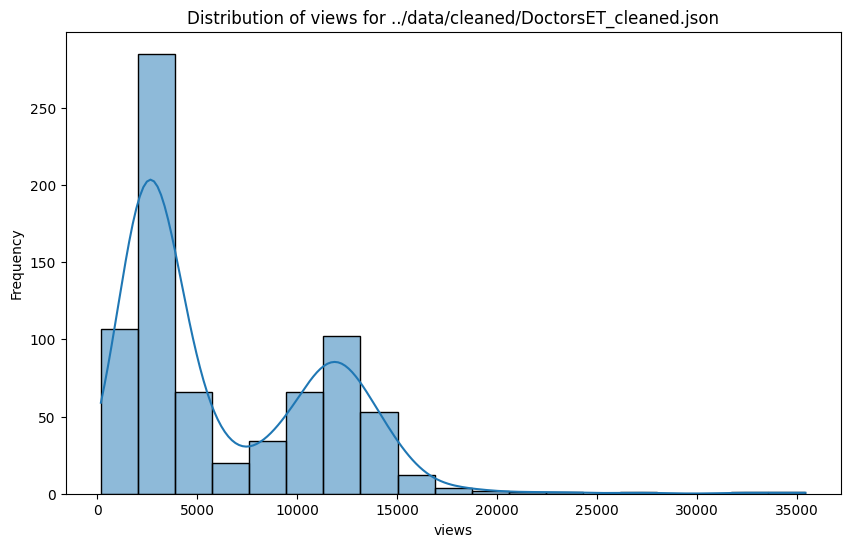

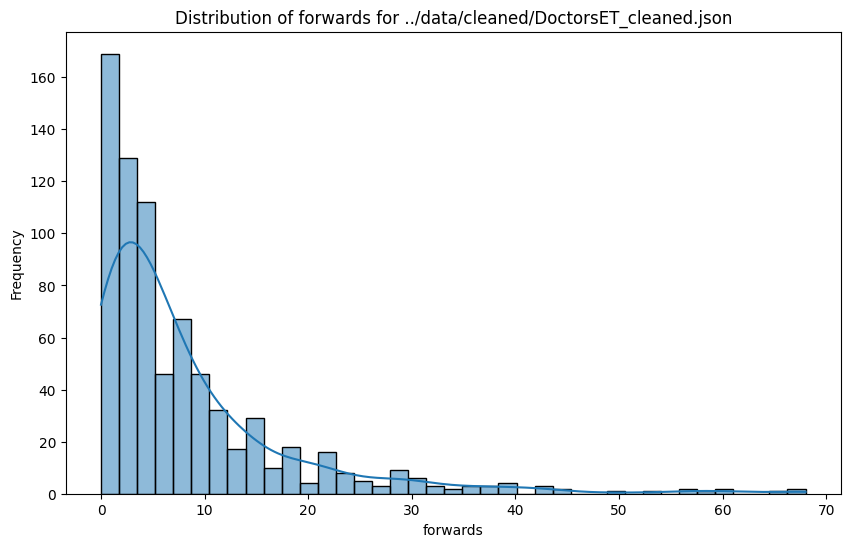

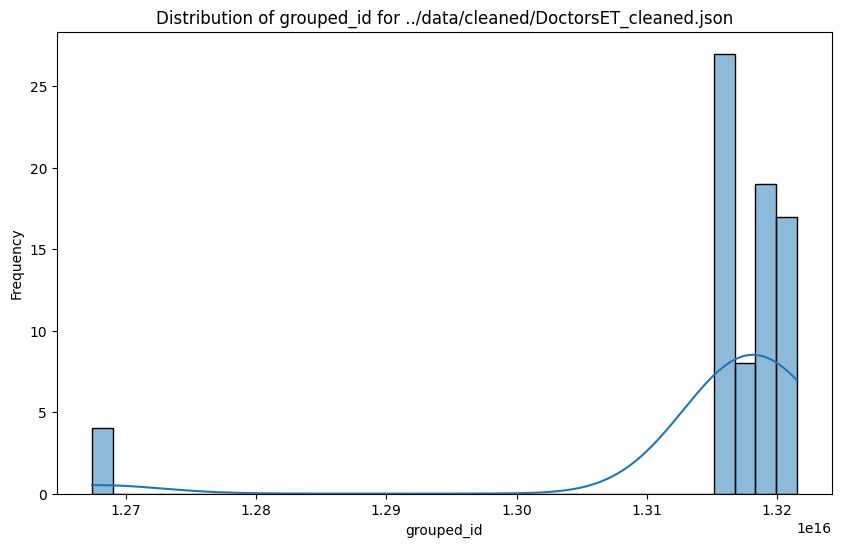

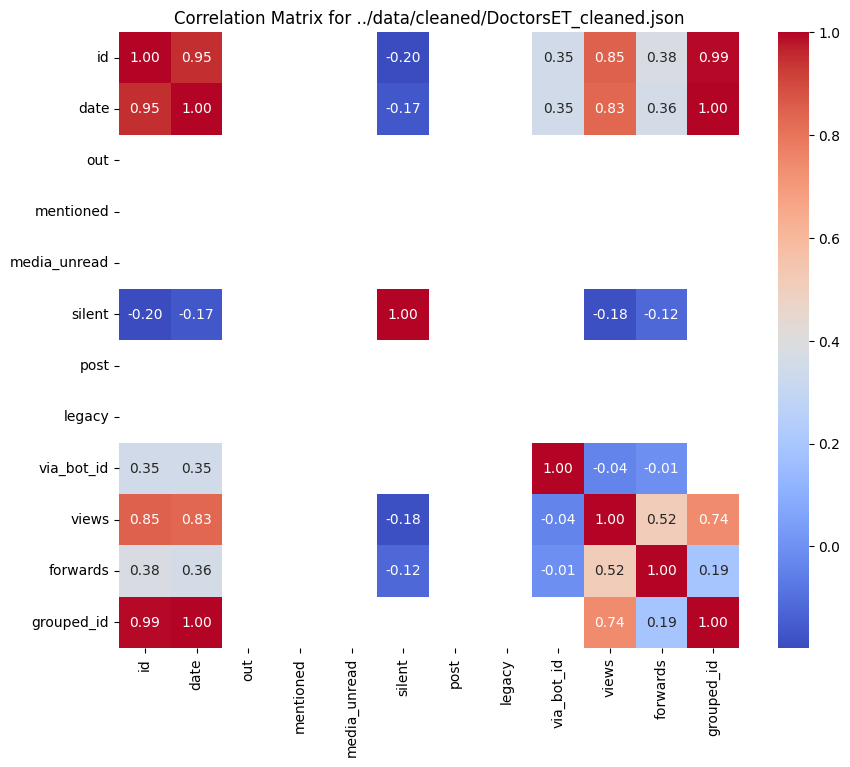

Column 'image' not found in the DataFrame.
Data Information for ../data/cleaned/EAHCI_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _                        1000 non-null   object 
 1   id                       1000 non-null   int64  
 2   peer_id                  1000 non-null   object 
 3   date                     1000 non-null   int64  
 4   message                  1000 non-null   object 
 5   out                      1000 non-null   bool   
 6   mentioned                1000 non-null   bool   
 7   media_unread             1000 non-null   bool   
 8   silent                   1000 non-null   bool   
 9   post                     1000 non-null   bool   
 10  from_scheduled           1000 non-null   object 
 11  legacy                   1000 non-null   bool   
 12  edit_hide                1000 no

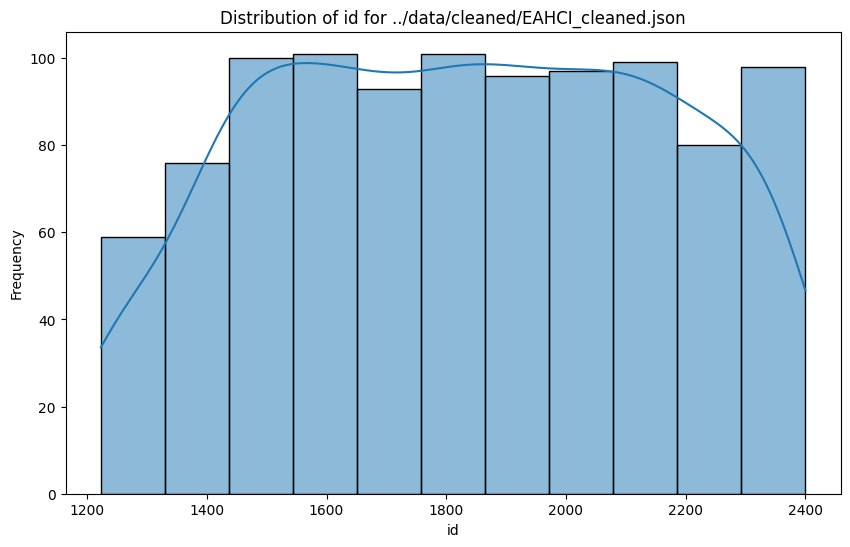

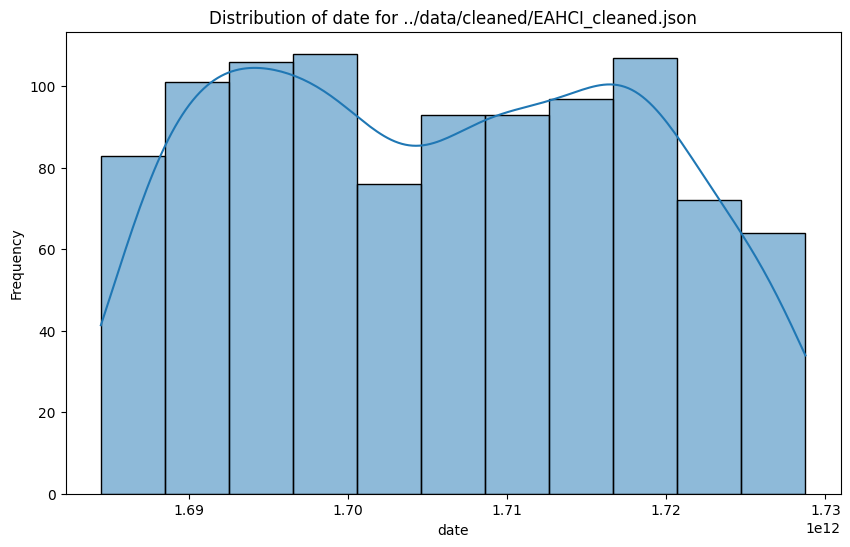

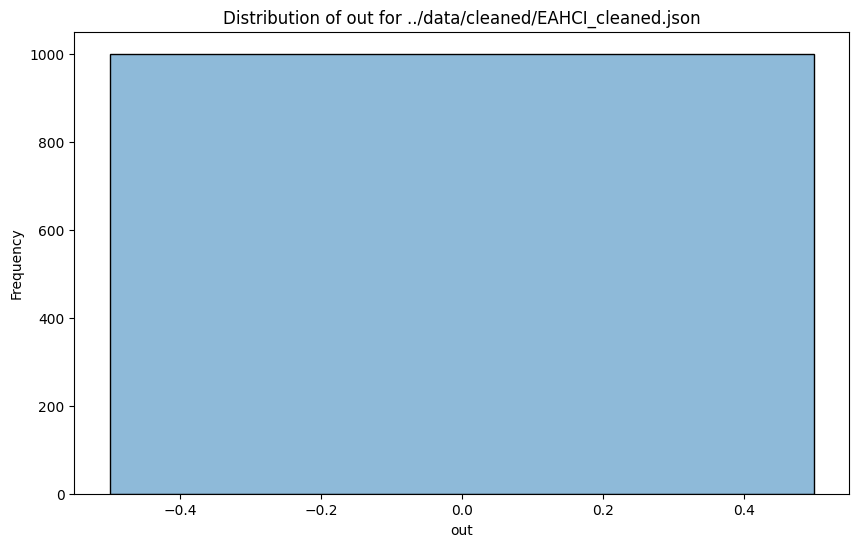

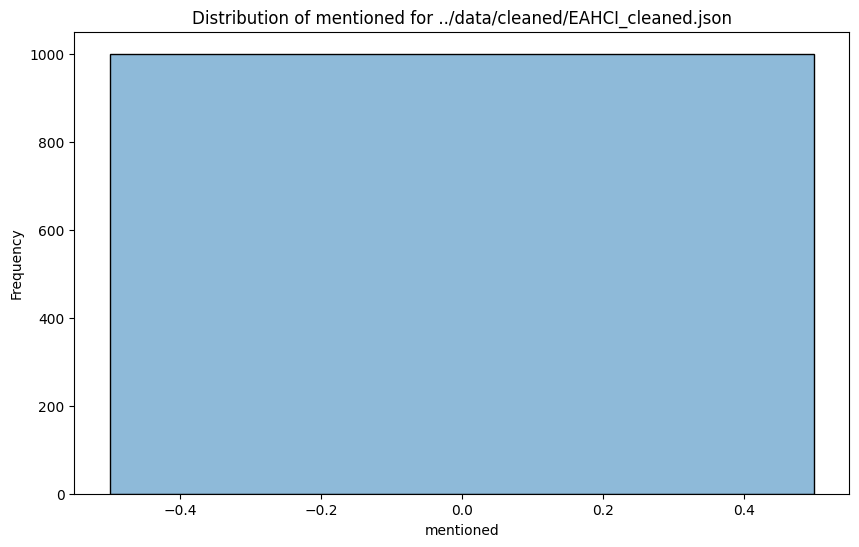

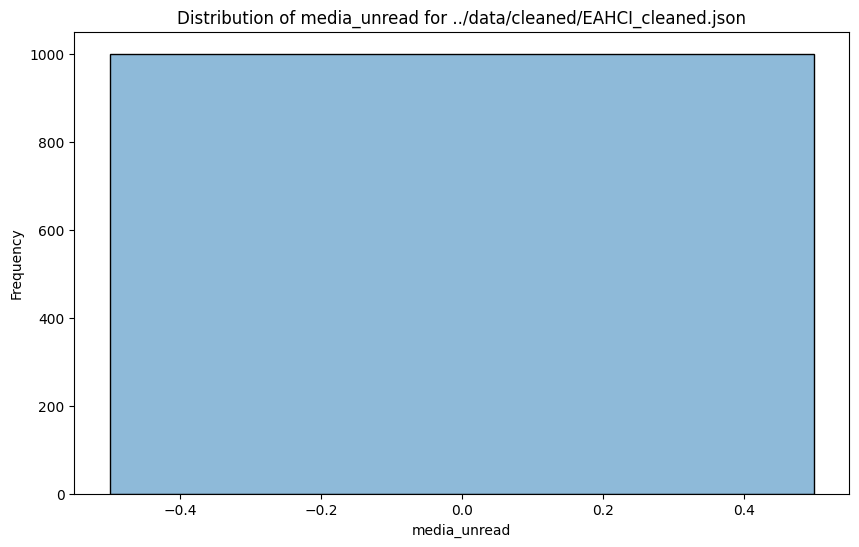

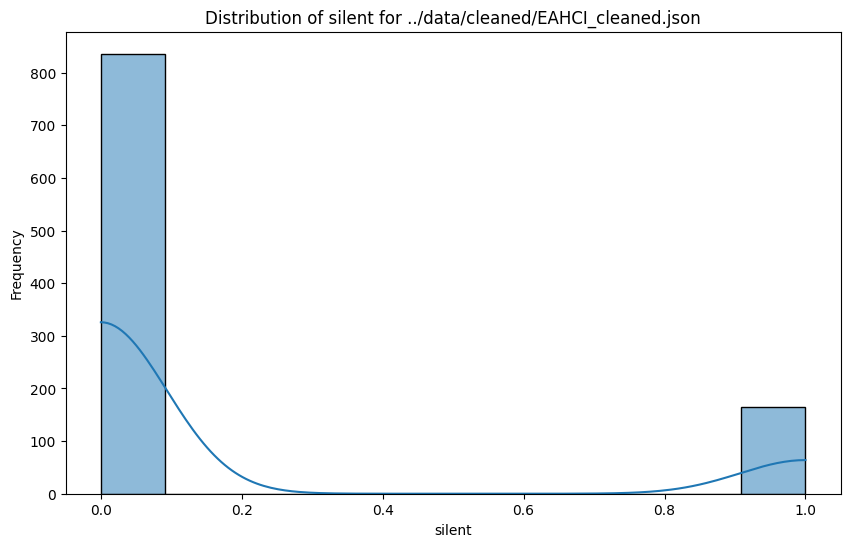

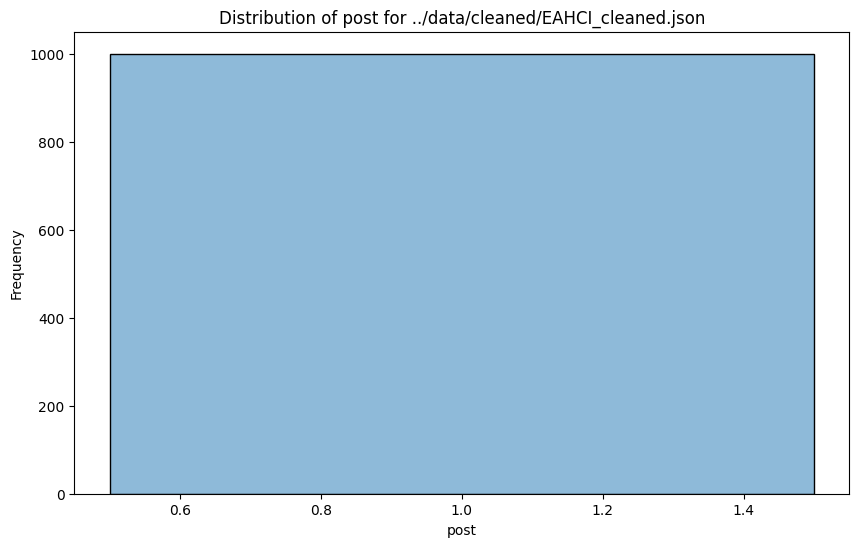

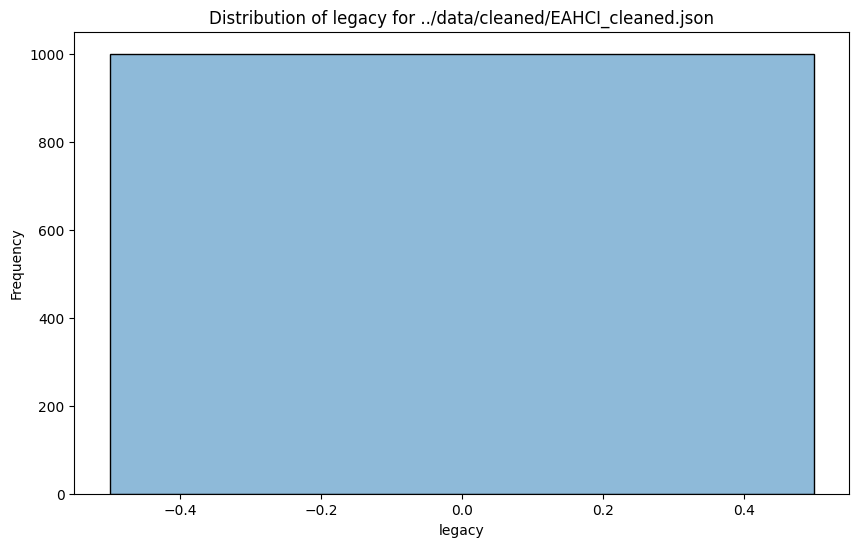

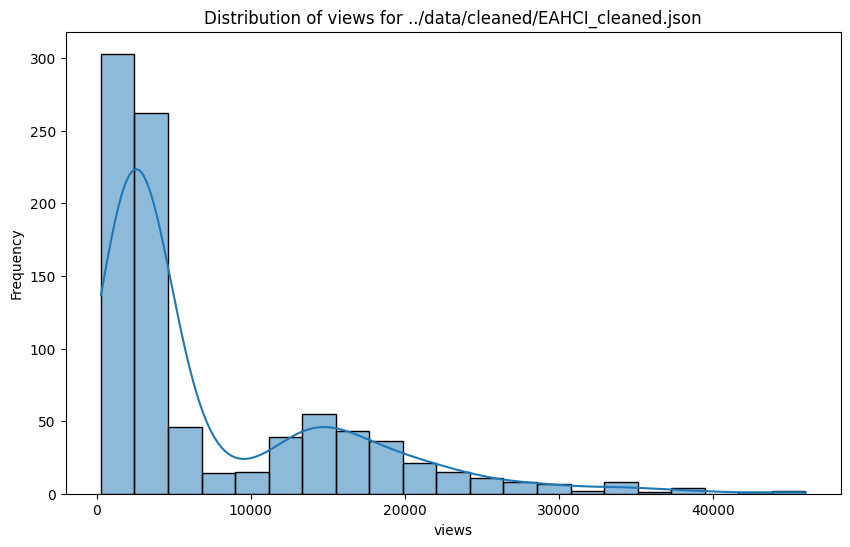

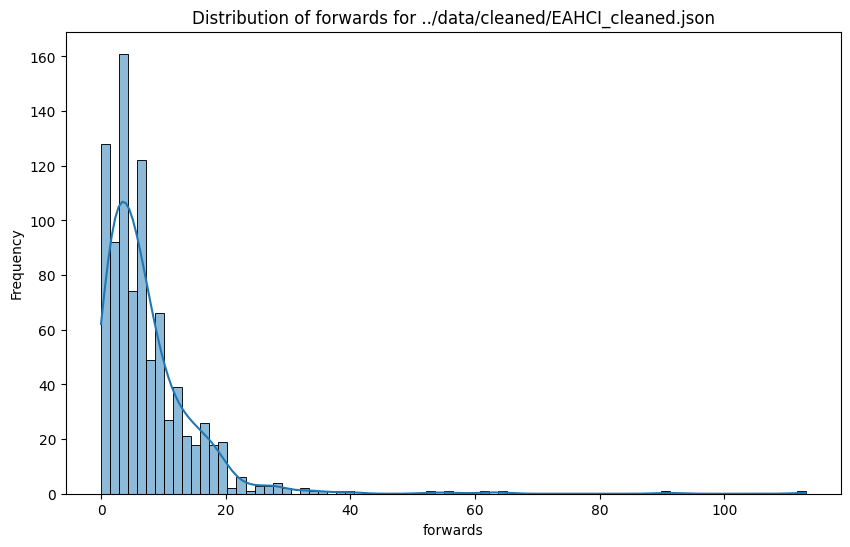

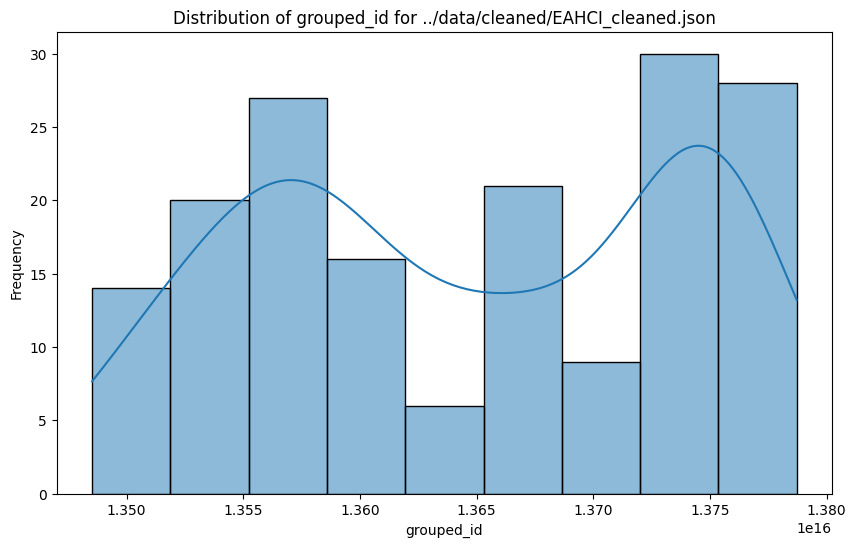

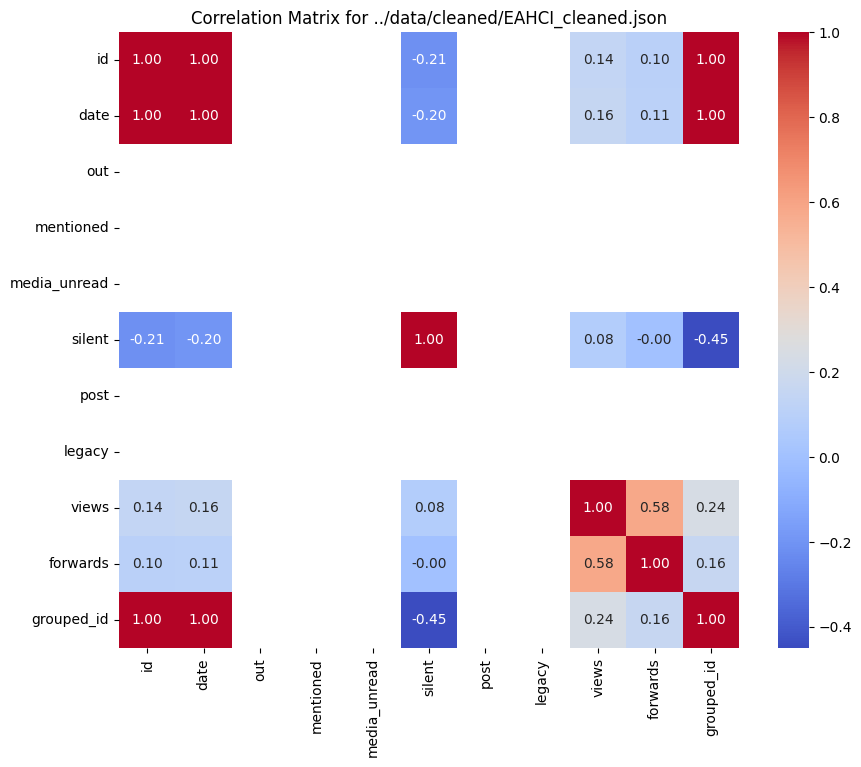

Column 'image' not found in the DataFrame.
Data Information for ../data/cleaned/yetenaweg_cleaned.json :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _                        1000 non-null   object 
 1   id                       1000 non-null   int64  
 2   peer_id                  1000 non-null   object 
 3   date                     1000 non-null   int64  
 4   action                   1000 non-null   object 
 5   out                      1000 non-null   bool   
 6   mentioned                1000 non-null   bool   
 7   media_unread             1000 non-null   bool   
 8   silent                   1000 non-null   bool   
 9   post                     1000 non-null   bool   
 10  legacy                   1000 non-null   bool   
 11  from_id                  1000 non-null   object 
 12  reply_to                 100

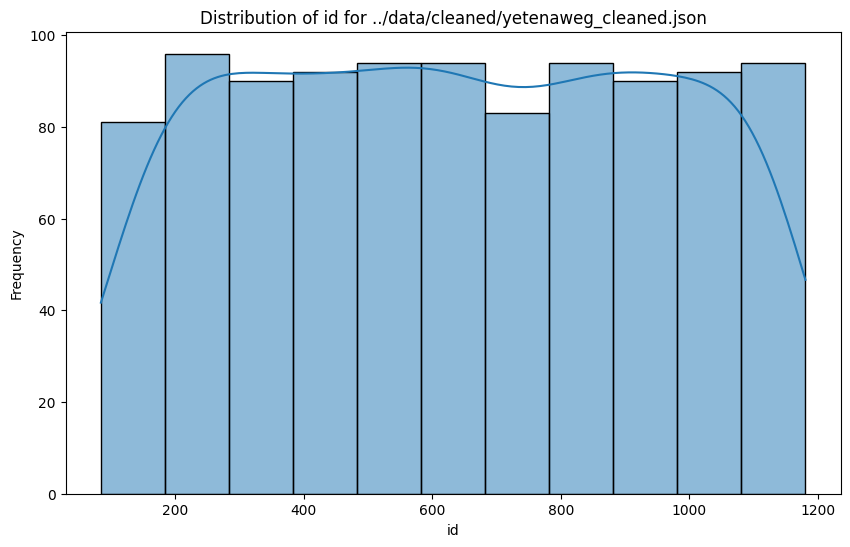

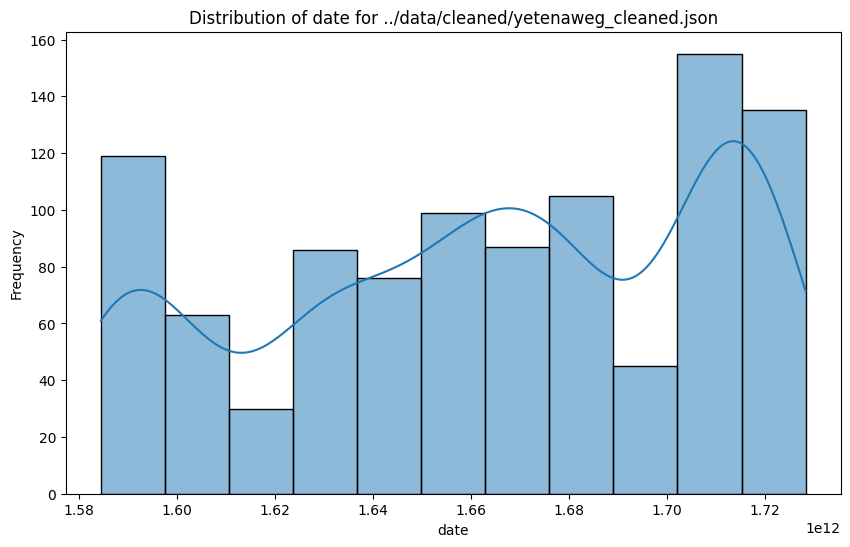

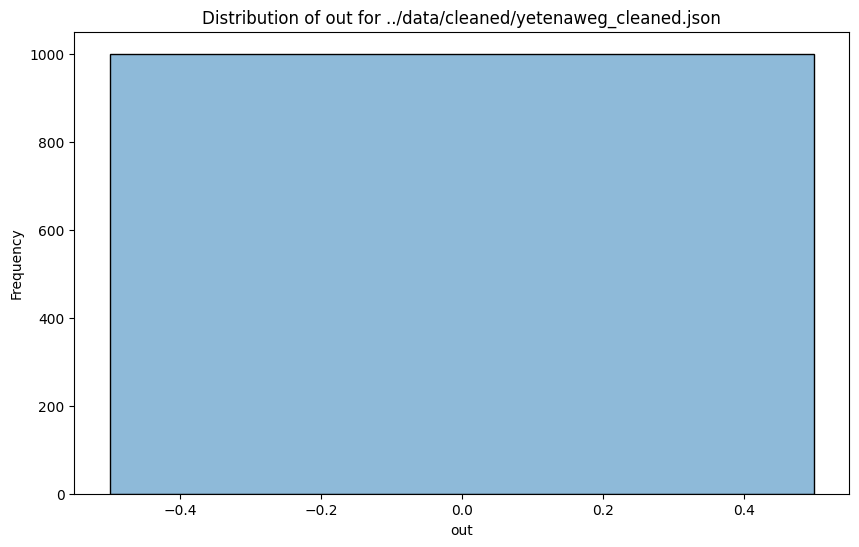

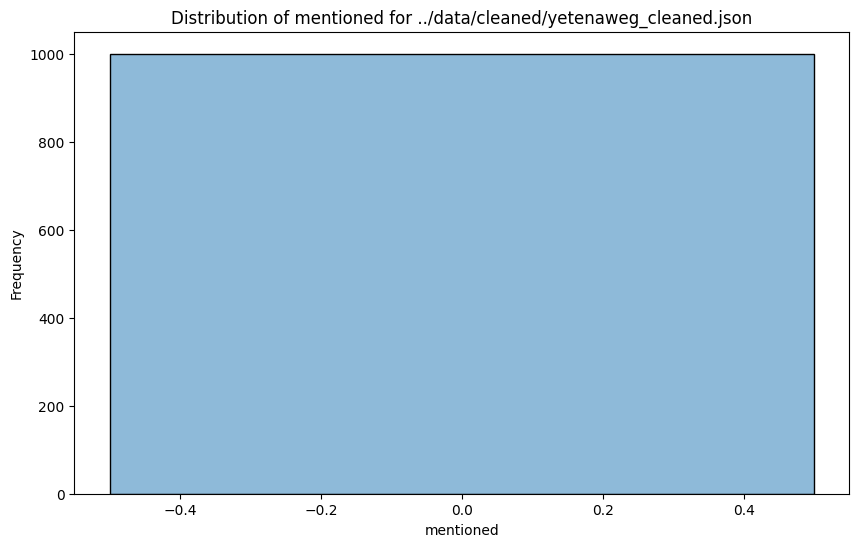

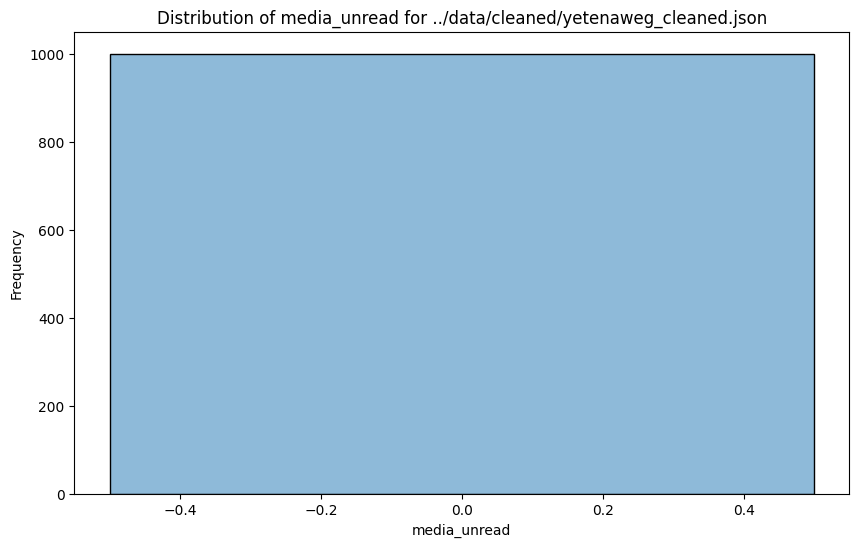

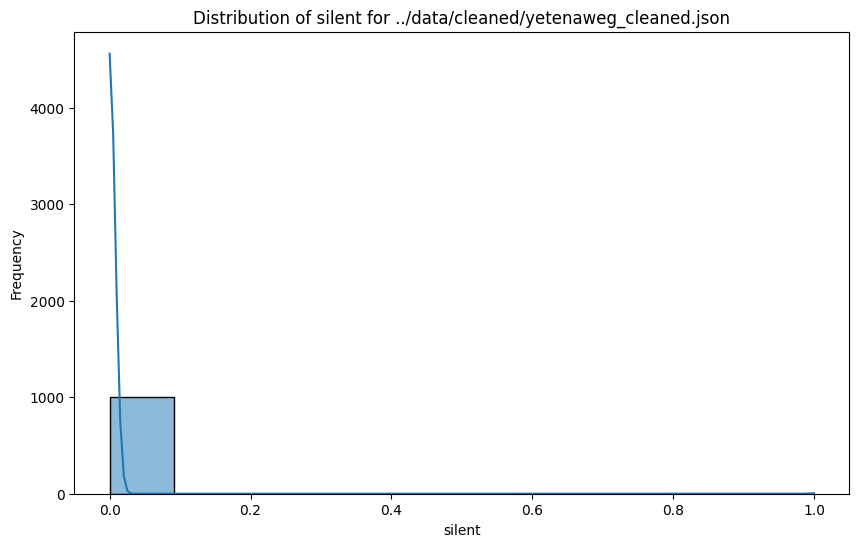

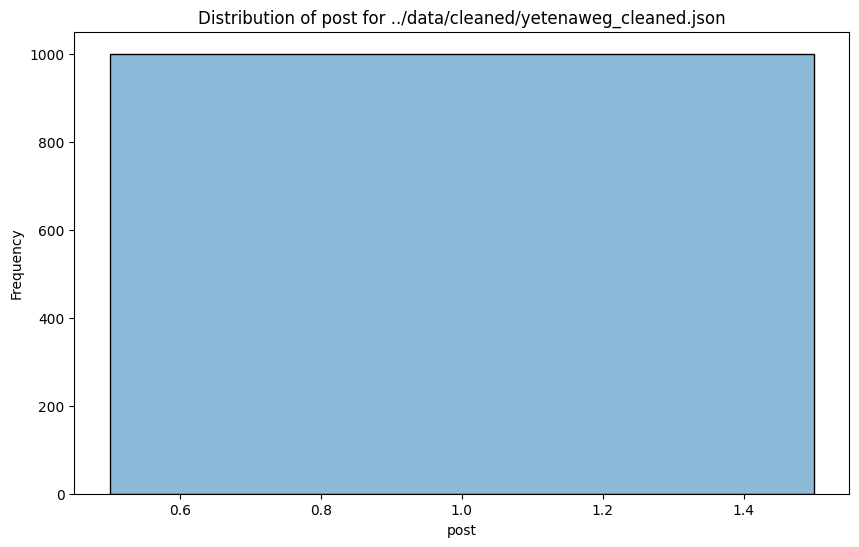

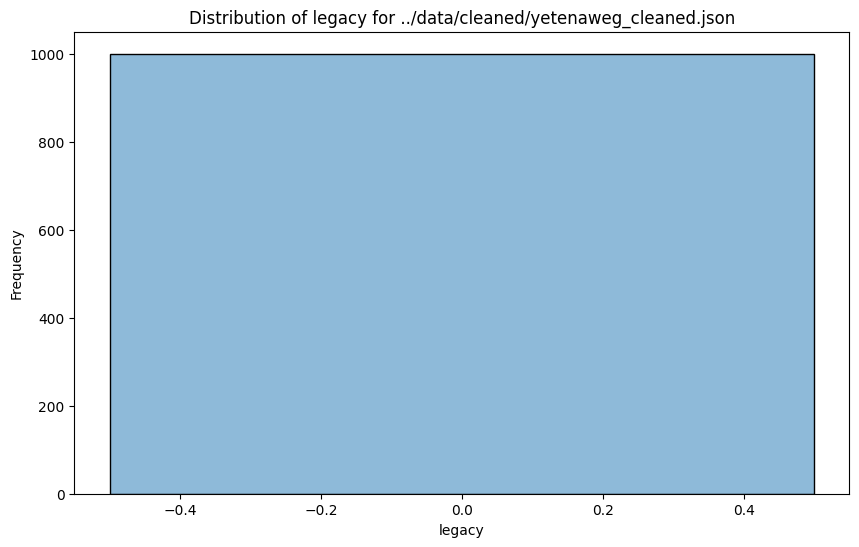

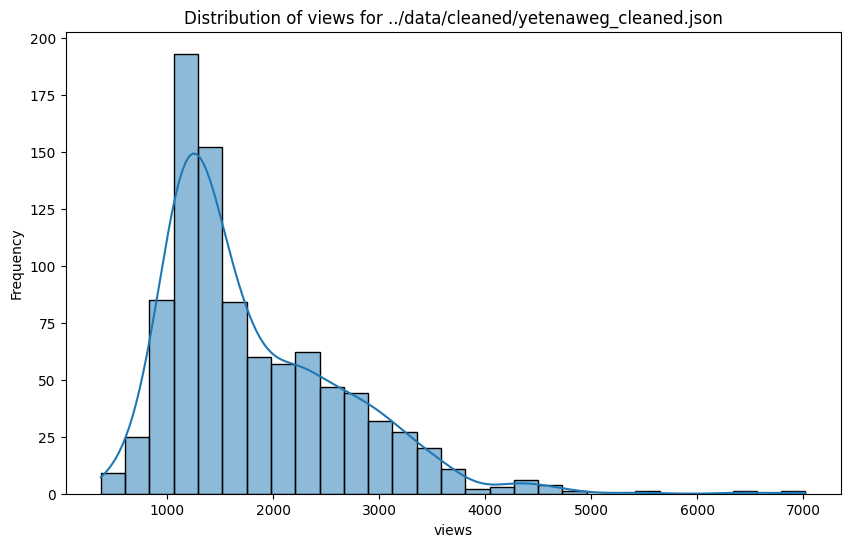

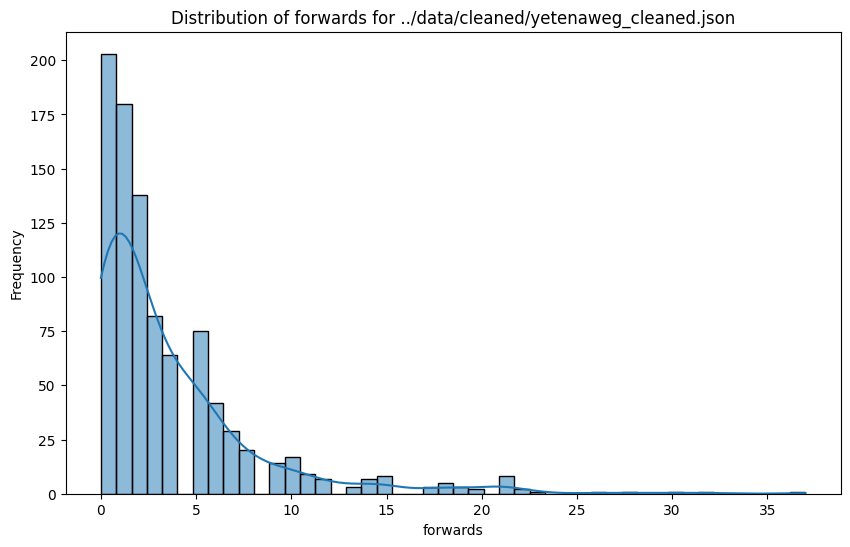

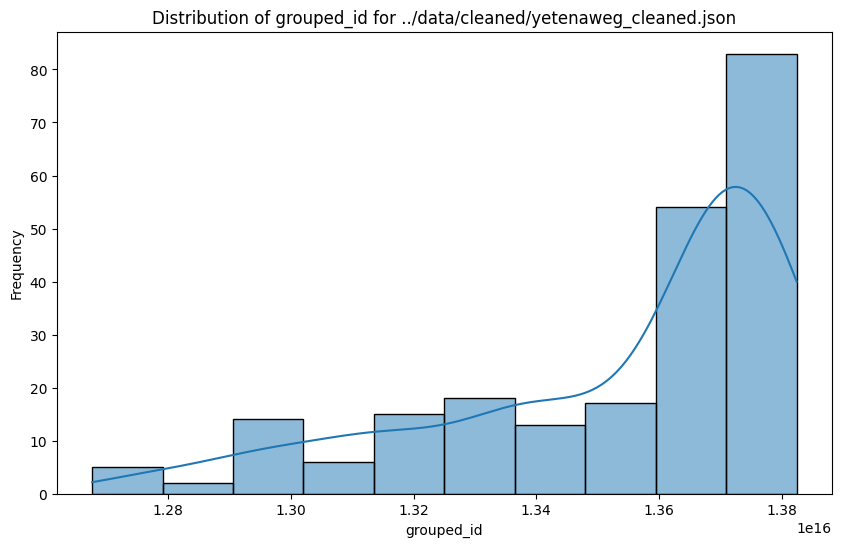

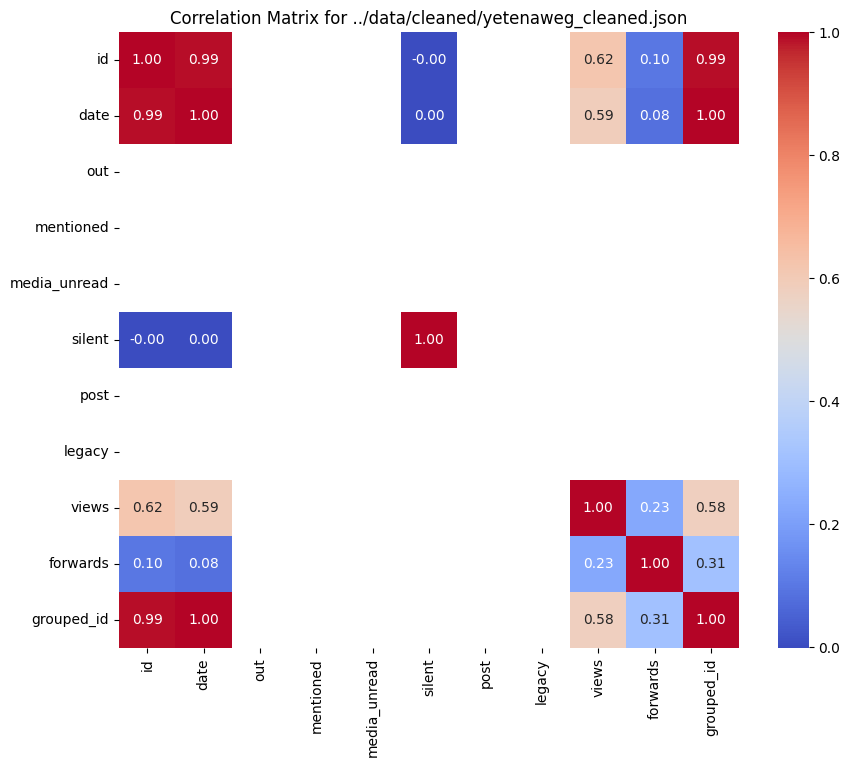

Column 'image' not found in the DataFrame.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import cv2
import os

# Function to perform EDA on a JSON file
def perform_eda(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # Display basic information about the dataset
    print("Data Information for", json_file, ":")
    df.info()

    # Summary statistics
    print("\nSummary Statistics for", json_file, ":")
    df.describe()

    # Distribution of numerical variables
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} for {json_file}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Correlation matrix for numerical variables only
    if len(num_cols) > 1:
        numerical_df = df[num_cols]
        plt.figure(figsize=(10, 8))
        sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix for ' + json_file)
        plt.show()
    else:
        print("Insufficient numerical columns for correlation analysis in", json_file)

    # Image analysis
    image_folder = 'image_folder'
    if 'image' in df.columns:
        sample_images = df['image'].sample(5).tolist()
        display_images(sample_images)
    else:
        print("Column 'image' not found in the DataFrame.")


# Function to display sample images
def display_images(images, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(image_folder, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(num_images, len(images)), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# List of JSON files
json_files = ['../data/cleaned/DoctorsET_cleaned.json', '../data/cleaned/EAHCI_cleaned.json', '../data/cleaned/yetenaweg_cleaned.json']

# Perform EDA on each JSON file
for file in json_files:
    perform_eda(file)